# Quantum Hearing
The goal of this project is to design an alternative way for anyone interested in quantum computing to experience quantum state evolution through music.

In [2]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, BasicAer, execute
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization.utils import _get_layered_instructions
from ipywidgets import widgets
from math import ceil as cl

In [3]:
def get_unitary(circuit):
    backend = BasicAer.get_backend("unitary_simulator")
    job_sim = execute(circuit, backend)
    result_sim = job_sim.result()
    output_state = result_sim.get_unitary(circuit, decimals=3)
    return output_state

def get_statevector(circuit):
    backend = BasicAer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    return job.result().get_statevector(circuit)

In [4]:
qasm = widgets.Text()

input_text = widgets.Text(
 placeholder='Your QASM here',
 description='Raw QASM:'
 )

def bind_input_to_output(sender):
    qasm.value = input_text.value

input_text.on_submit(bind_input_to_output)

## QASM
Insert QASM code below and hit enter to save input

In [6]:
input_text
# Insert QASM code below and hit enter to save input

Text(value='OPENQASM 2.0; include "qelib1.inc";  qreg q[3]; creg c[3];  h q[0]; h q[1]; h q[2]; s q[0]; s q[1]…

┌───┐┌───┐┌───┐┌─────┐┌───┐          ┌───┐┌───┐
q_0: ┤ H ├┤ S ├┤ T ├┤ TDG ├┤ T ├───────■──┤ T ├┤ T ├
     ├───┤├───┤├───┤└─────┘├───┤┌───┐┌─┴─┐├───┤├───┤
q_1: ┤ H ├┤ S ├┤ S ├───■───┤ S ├┤ H ├┤ X ├┤ H ├┤ H ├
     ├───┤├───┤├───┤ ┌─┴─┐ └───┘└───┘└───┘└───┘└───┘
q_2: ┤ H ├┤ S ├┤ S ├─┤ X ├──────────────────────────
     └───┘└───┘└───┘ └───┘                          
c: 3/═══════════════════════════════════════════════

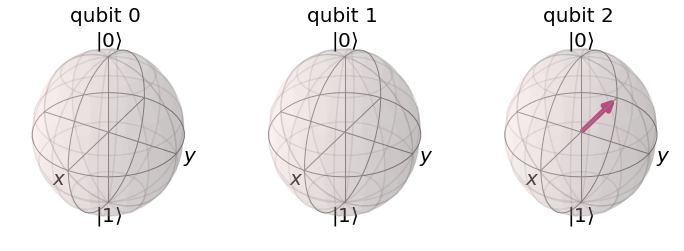

In [7]:
try:
    circuit = QuantumCircuit.from_qasm_str(qasm.value)
    vector = get_statevector(circuit)
    unitary = get_unitary(circuit)
    display(circuit.draw())
    num_qubits = circuit.num_qubits
    if num_qubits >= 2:
        display(plot_bloch_multivector(vector))
except:
    print("Either no circuit was input or you forgot to hit enter \U0001f600")

In [11]:
# break by columns
circuits_temp = []
qubits, clbits, ops = _get_layered_instructions(circuit)
for column in range(len(ops)):
    #print("column")
    for gate in range(len(ops[column])):
        #print(ops[column][gate].op)
        #print(ops[column][gate].qargs)
        #print(ops[column][gate].cargs)

        ggate = QuantumCircuit(num_qubits)
        ggate.append(ops[column][gate].op,ops[column][gate].qargs,ops[column][gate].cargs)
        circuits_temp.append(ggate)
        #for i,sub in enumerate(circuits_temp):
        #    sub_circuits[column] += circuits_temp[i]

for sub in circuits_temp:
    display(sub.draw())

┌───┐
q_0: ┤ H ├
     └───┘
q_1: ─────
          
q_2: ─────

q_0: ─────
     ┌───┐
q_1: ┤ H ├
     └───┘
q_2: ─────

q_0: ─────
          
q_1: ─────
     ┌───┐
q_2: ┤ H ├
     └───┘

┌───┐
q_0: ┤ S ├
     └───┘
q_1: ─────
          
q_2: ─────

q_0: ─────
     ┌───┐
q_1: ┤ S ├
     └───┘
q_2: ─────

q_0: ─────
          
q_1: ─────
     ┌───┐
q_2: ┤ S ├
     └───┘

┌───┐
q_0: ┤ T ├
     └───┘
q_1: ─────
          
q_2: ─────

q_0: ─────
     ┌───┐
q_1: ┤ S ├
     └───┘
q_2: ─────

q_0: ─────
          
q_1: ─────
     ┌───┐
q_2: ┤ S ├
     └───┘

┌─────┐
q_0: ┤ TDG ├
     └─────┘
q_1: ───────
            
q_2: ───────

q_0: ─────
          
q_1: ──■──
     ┌─┴─┐
q_2: ┤ X ├
     └───┘

┌───┐
q_0: ┤ T ├
     └───┘
q_1: ─────
          
q_2: ─────

q_0: ─────
     ┌───┐
q_1: ┤ S ├
     └───┘
q_2: ─────

q_0: ─────
     ┌───┐
q_1: ┤ H ├
     └───┘
q_2: ─────

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘
q_2: ─────

┌───┐
q_0: ┤ T ├
     └───┘
q_1: ─────
          
q_2: ─────

q_0: ─────
     ┌───┐
q_1: ┤ H ├
     └───┘
q_2: ─────

┌───┐
q_0: ┤ T ├
     └───┘
q_1: ─────
          
q_2: ─────

q_0: ─────
     ┌───┐
q_1: ┤ H ├
     └───┘
q_2: ─────

In [20]:
# Each sub-circuit will have the same number of qubits as the original circuit
sub_circuits = []

print(circuit.data)
print(id(circuit[1]))

# https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html#qiskit.circuit.QuantumCircuit.data
for (insn, qargs, cargs) in circuit.data:
    #print(insn)
    #print(qargs)
    #print(cargs)
    gate = QuantumCircuit(num_qubits)

    #state_vector = get_state_vector(sub_circuit)
    #print_state_vector(state_vector)
    
    #unitary_matrix = get_unitary_matrix(circuit)
    #print_matrix(unitary_matrix)
    
    # https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html#qiskit.circuit.QuantumCircuit.append
    gate.append(insn, qargs, cargs)
    sub_circuits.append(gate)
    
gates_per_division = 2
divisions = cl(circuit.size() / gates_per_division) # number of divisions based on arbitrary "gate_per_division"
print(divisions)

# every 2 gates compile small_circuit and get unitary
for i,set_of_gates in enumerate(range(divisions)):
    small_circuit = QuantumCircuit(num_qubits)
    for j,gate in enumerate(range(gates_per_division)):
        if i == (divisions - 1) and len(sub_circuits) % 2 != 0:
            small_circuit += sub_circuits[i*gates_per_division]
            small_circuit += QuantumCircuit(3) # if odd number of gates, add empty wire to last gate so it makes a pair
            break;
        small_circuit += sub_circuits[j + i*gates_per_division]
    display(small_circuit.draw())


[(<qiskit.circuit.library.standard_gates.h.HGate object at 0x7fc608f899d0>, [Qubit(QuantumRegister(3, 'q'), 0)], []), (<qiskit.circuit.library.standard_gates.s.SGate object at 0x7fc608f8d5b0>, [Qubit(QuantumRegister(3, 'q'), 0)], []), (<qiskit.circuit.library.standard_gates.t.TGate object at 0x7fc608f8d580>, [Qubit(QuantumRegister(3, 'q'), 0)], []), (<qiskit.circuit.library.standard_gates.t.TdgGate object at 0x7fc608f8d550>, [Qubit(QuantumRegister(3, 'q'), 0)], []), (<qiskit.circuit.library.standard_gates.t.TGate object at 0x7fc608f8d520>, [Qubit(QuantumRegister(3, 'q'), 0)], []), (<qiskit.circuit.library.standard_gates.h.HGate object at 0x7fc608f8d4f0>, [Qubit(QuantumRegister(3, 'q'), 1)], []), (<qiskit.circuit.library.standard_gates.s.SGate object at 0x7fc608f8d4c0>, [Qubit(QuantumRegister(3, 'q'), 1)], []), (<qiskit.circuit.library.standard_gates.s.SGate object at 0x7fc608f8d160>, [Qubit(QuantumRegister(3, 'q'), 1)], []), (<qiskit.circuit.library.standard_gates.h.HGate object at 0x7

┌───┐┌───┐
q_0: ┤ H ├┤ S ├
     └───┘└───┘
q_1: ──────────
               
q_2: ──────────

┌───┐┌─────┐
q_0: ┤ T ├┤ TDG ├
     └───┘└─────┘
q_1: ────────────
                 
q_2: ────────────

┌───┐
q_0: ┤ T ├
     ├───┤
q_1: ┤ H ├
     └───┘
q_2: ─────

q_0: ──────────
     ┌───┐┌───┐
q_1: ┤ S ├┤ S ├
     └───┘└───┘
q_2: ──────────

q_0: ──────────
               
q_1: ──────────
     ┌───┐┌───┐
q_2: ┤ H ├┤ S ├
     └───┘└───┘

q_0: ──────────
               
q_1: ───────■──
     ┌───┐┌─┴─┐
q_2: ┤ S ├┤ X ├
     └───┘└───┘

q_0: ──────────
     ┌───┐┌───┐
q_1: ┤ S ├┤ H ├
     └───┘└───┘
q_2: ──────────

┌───┐
q_0: ──■──┤ T ├
     ┌─┴─┐└───┘
q_1: ┤ X ├─────
     └───┘     
q_2: ──────────

┌───┐
q_0: ┤ T ├
     ├───┤
q_1: ┤ H ├
     └───┘
q_2: ─────

q_0: ─────
     ┌───┐
q_1: ┤ H ├
     └───┘
q_2: ─────

In [21]:
for sub_circuit in sub_circuits:
    display(sub_circuit.draw())
    #print(get_statevector(sub_circuit))
    #print(get_unitary(sub_circuit))

┌───┐
q_0: ┤ H ├
     └───┘
q_1: ─────
          
q_2: ─────

┌───┐
q_0: ┤ S ├
     └───┘
q_1: ─────
          
q_2: ─────

┌───┐
q_0: ┤ T ├
     └───┘
q_1: ─────
          
q_2: ─────

┌─────┐
q_0: ┤ TDG ├
     └─────┘
q_1: ───────
            
q_2: ───────

┌───┐
q_0: ┤ T ├
     └───┘
q_1: ─────
          
q_2: ─────

q_0: ─────
     ┌───┐
q_1: ┤ H ├
     └───┘
q_2: ─────

q_0: ─────
     ┌───┐
q_1: ┤ S ├
     └───┘
q_2: ─────

q_0: ─────
     ┌───┐
q_1: ┤ S ├
     └───┘
q_2: ─────

q_0: ─────
          
q_1: ─────
     ┌───┐
q_2: ┤ H ├
     └───┘

q_0: ─────
          
q_1: ─────
     ┌───┐
q_2: ┤ S ├
     └───┘

q_0: ─────
          
q_1: ─────
     ┌───┐
q_2: ┤ S ├
     └───┘

q_0: ─────
          
q_1: ──■──
     ┌─┴─┐
q_2: ┤ X ├
     └───┘

q_0: ─────
     ┌───┐
q_1: ┤ S ├
     └───┘
q_2: ─────

q_0: ─────
     ┌───┐
q_1: ┤ H ├
     └───┘
q_2: ─────

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘
q_2: ─────

┌───┐
q_0: ┤ T ├
     └───┘
q_1: ─────
          
q_2: ─────

┌───┐
q_0: ┤ T ├
     └───┘
q_1: ─────
          
q_2: ─────

q_0: ─────
     ┌───┐
q_1: ┤ H ├
     └───┘
q_2: ─────

q_0: ─────
     ┌───┐
q_1: ┤ H ├
     └───┘
q_2: ─────

In [22]:
# Check if the combined circuit looks like the original
combined_circuit = sub_circuits[0]
for i in range(1, len(sub_circuits)):
    # https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html#qiskit.circuit.QuantumCircuit.compose
    combined_circuit = combined_circuit.compose(sub_circuits[i])
    # combined_circuit += sub_circuits[i]

# Print combined circuit
display(combined_circuit.draw())


┌───┐┌───┐┌───┐┌─────┐┌───┐          ┌───┐┌───┐
q_0: ┤ H ├┤ S ├┤ T ├┤ TDG ├┤ T ├───────■──┤ T ├┤ T ├
     ├───┤├───┤├───┤└─────┘├───┤┌───┐┌─┴─┐├───┤├───┤
q_1: ┤ H ├┤ S ├┤ S ├───■───┤ S ├┤ H ├┤ X ├┤ H ├┤ H ├
     ├───┤├───┤├───┤ ┌─┴─┐ └───┘└───┘└───┘└───┘└───┘
q_2: ┤ H ├┤ S ├┤ S ├─┤ X ├──────────────────────────
     └───┘└───┘└───┘ └───┘

In [163]:
# Print original
circuit.draw()

┌───┐┌───┐┌───┐┌─────┐┌───┐          ┌───┐┌───┐
q_0: ┤ H ├┤ S ├┤ T ├┤ TDG ├┤ T ├───────■──┤ T ├┤ T ├
     ├───┤├───┤├───┤└─────┘├───┤┌───┐┌─┴─┐├───┤├───┤
q_1: ┤ H ├┤ S ├┤ S ├───■───┤ S ├┤ H ├┤ X ├┤ H ├┤ H ├
     ├───┤├───┤├───┤ ┌─┴─┐ └───┘└───┘└───┘└───┘└───┘
q_2: ┤ H ├┤ S ├┤ S ├─┤ X ├──────────────────────────
     └───┘└───┘└───┘ └───┘                          
c: 3/═══════════════════════════════════════════════